### Imports
Importazioni dei pacchetti e inizializzazioni varie

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from repository import load_csv_to_dict

import os
import traceback

from heuristic import *
from problem import ProblemFactory
from search import ReachGoal
from visualize import Animation
from input_handler import InputHandler
import repository
import pandas as pd

### Carico il report da file


In [11]:
for i in range(0,10):
    os.system("python pf4ea gen -f exp_0.csv -v --heuristic h5 --csv_output")

KeyboardInterrupt: 

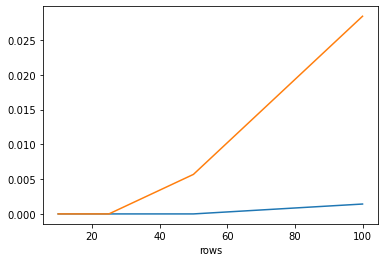

In [22]:
import matplotlib.pyplot as plt

df = pd.read_csv("benchmarks\output_csv\output_exp_0.csv")
grouped_df = df.groupby(['rows']).mean()
# print(grouped_df)
grouped_df["search_time"].plot()
grouped_df["heuristic_time"].plot()
plt.show()
# plot = grouped_df.plot(y='total_states', title='Time to reach goal', legend=False)

